In [1]:
import os
import requests
import json
from pprint import pprint
import time
import csv

import numpy as np
from matplotlib.pylab import plt #load plot library
%matplotlib inline 

In [2]:
datapath = "../data/"
outputs = "../outputs/"

In [3]:
api_key = "c0c23ee1793316f86663e645642d8754"

# links
* https://darksky.net/dev/docs
* https://github.com/bitpixdigital/forecastiopy3

# evaluate Rio de Janeiro neighborhoods

In [4]:
def get_data(location, time_tuple):
    latitude=location[0]
    longitude=location[1]
    asctime= str(int(time.mktime(time_tuple)))
    units = "si"
    lang = "en"
    url = "https://api.darksky.net/forecast/{}/{},{},{}?units={}&lang={}".format(api_key, latitude, longitude, asctime, units, lang)
    r = requests.get(url)
    data = json.loads(r.text)
    return data

In [5]:
rj_meier = [-22.902686, -43.278779]
rj_lagoa = [-22.962273, -43.203564]
rj_barra = [-22.998090, -43.359757]

In [6]:
days_dict = {}
for loc in ["rj_meier", "rj_lagoa", "rj_barra"]:
    rj_dict = {}
    for day in range(1,17,3):
        time_tuple = (2019, 3, day, 0, 0, 0, 0, 0, 0)
        data = get_data(eval(loc), time_tuple)
        rj_dict[day] = data
    days_dict[loc] = rj_dict

In [7]:
days_dict

{'rj_meier': {1: {'latitude': -22.902686,
   'longitude': -43.278779,
   'timezone': 'America/Sao_Paulo',
   'currently': {'time': 1551409200,
    'summary': 'Possible Light Rain and Humid',
    'icon': 'rain',
    'precipIntensity': 1.1023,
    'precipProbability': 0.48,
    'precipType': 'rain',
    'temperature': 25.82,
    'apparentTemperature': 27.68,
    'dewPoint': 24.83,
    'humidity': 0.94,
    'pressure': 1014.53,
    'windSpeed': 0.67,
    'windGust': 2.1,
    'windBearing': 165,
    'cloudCover': 1,
    'uvIndex': 0,
    'visibility': 8.727,
    'ozone': 248.2},
   'hourly': {'summary': 'Rain and humid throughout the day.',
    'icon': 'rain',
    'data': [{'time': 1551409200,
      'summary': 'Possible Light Rain and Humid',
      'icon': 'rain',
      'precipIntensity': 1.1023,
      'precipProbability': 0.48,
      'precipType': 'rain',
      'temperature': 25.82,
      'apparentTemperature': 27.68,
      'dewPoint': 24.83,
      'humidity': 0.94,
      'pressure': 1014

In [8]:
meier = []
X = []
for day in range(1,17,3):
    meier.append(days_dict['rj_meier'][day]['currently']['precipIntensity'])
barra = []
for day in range(1,17,3):
    barra.append(days_dict['rj_barra'][day]['currently']['precipIntensity'])
lagoa = []
for day in range(1,17,3):
    lagoa.append(days_dict['rj_lagoa'][day]['currently']['precipIntensity'])
    
    X.append(day)

In [9]:
meier

[1.1023, 0.2244, 0, 0, 0.041, 0.0965]

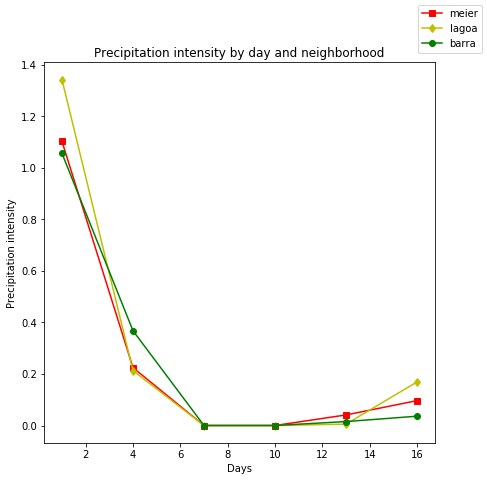

In [159]:
legend = ['meier', 'lagoa', 'barra']

fig, ax = plt.subplots(figsize=(7,7))
title = 'Precipitation intensity by day and neighborhood'
ax.set_title(title)
ax.set_xlabel('Days')
ax.set_ylabel('Precipitation intensity')
l1, l2, l3 = ax.plot(X, meier, 'rs-', X, lagoa, 'yd-', X, barra, 'go-')
fig.legend((l1, l2, l3), legend)

# final comments
We see that the pricipitation changes according to neighborhood.

# decision
We are going to use average value